In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

color_lst = ['#059ff6', '#f22e92', '#7565df', '#8fd5fa', '#0c385b', '#a1c1ea']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color_lst) 




In [3]:
experiment = pd.read_csv('../data/analytical_take_home_data_v3.csv')
experiment.head()

,treatment,company_size,campaign_spend,campaign_budget
0,False,small,10.4477,3.9035
1,False,medium,3.7776,1.9872
2,False,medium,46.1880,55.4523
3,False,small,6.6271,6.5136
4,False,small,92.3405,83.1018


In [64]:
# Data is collected from 15,474 advertisers with the experimentation randomly splitting advertisers 
# to test the new product
experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   treatment        15474 non-null  bool   
 1   company_size     15474 non-null  object 
 2   campaign_spend   15474 non-null  float64
 3   campaign_budget  15474 non-null  float64
 4   overspend        15474 non-null  float64
dtypes: bool(1), float64(3), object(1)
memory usage: 498.8+ KB


### Data Schema 

A/B Testing Result <br>
**Experiment**: pay each time ads appears in a user’s viewport rather than each time a user clicks on ads. (CTR vs Impressions)<br>

<br>


1) treatment 
- true = new product (pay on impressions)
- false = old product (pay on clicks)

2) company size
- small: local businesses 
- medium: small national brands
- large: global brands 

3) campaign spend & campaign budget: amount budgeted by the advertizers and spent by Twitter in the time of the experiment

In [65]:
# Overspend: the amount that Twitter has to cover for ad spend that exceeded the campaign's budget. 
# if spending remains within the budget, Twitter will not incur any additional overspend expense (hence, $0)
experiment['overspend'] = experiment.campaign_spend - experiment.campaign_budget
experiment['overspend'] = experiment.overspend.clip(lower=0)

In [12]:
experiment.head()

,treatment,company_size,campaign_spend,campaign_budget,overspend
0,False,small,10.4477,3.9035,6.5442
1,False,medium,3.7776,1.9872,1.7904
2,False,medium,46.1880,55.4523,0.0000
3,False,small,6.6271,6.5136,0.1135
4,False,small,92.3405,83.1018,9.2387


In [22]:
experiment_count = experiment.treatment.value_counts()
experiment_count

True     7741
False    7733
Name: treatment, dtype: int64

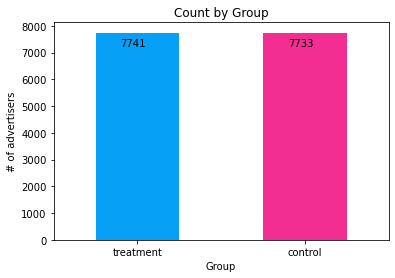

In [105]:
ax = experiment_count.plot(kind='bar', color=color_lst[:2], title='Count by Group',
                          xlabel='Group', ylabel='# of advertisers')

ax.set_xticklabels(['treatment', 'control'], rotation=0)


for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + 0.15, p.get_height() - 500))



In [82]:
mapping_dict = {True:'treatment', False:'control'}

experiment_prop = experiment.treatment.value_counts(normalize=True).rename(index=mapping_dict)
experiment_prop

treatment    0.500258
control      0.499742
Name: treatment, dtype: float64

In [100]:
company_size_count = experiment.company_size.value_counts(normalize=True)
company_size_count

small     0.575223
large     0.332558
medium    0.092219
Name: company_size, dtype: float64

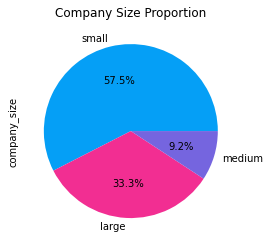

In [109]:
company_size_count.plot(kind='pie', autopct='%1.1f%%', title='Company Size Proportion');

In [111]:
company_size_count = pd.crosstab(experiment.company_size, experiment.treatment, colnames=['group'])
company_size_count.rename(columns=mapping_dict, inplace=True)
company_size_count

group,control,treatment
company_size,,
large,2701,2445
medium,735,692
small,4297,4604


In [ ]:
fig, ax = 